# 📊 Örneklem ve Gözlem Birimi: Gerçekliği Temsil Eden Küçük Grup

## Giriş: Ana Kütleye Ulaşmak Mümkün mü?

Diyelim ki Türkiye’deki 5 yaşındaki çocukların boy ortalamasını ölçmek istiyorsun.  
Ama her çocuğu ölçmeye ulaşman mümkün değil.  
O zaman ne yaparsın?

👉 Sadece küçük bir örneklem alırsın.  
Ve bu örneklem üzerinden ana kütleyi tahmin edersin.

> “Örneklem, gerçekliğin küçük bir versiyonudur.  
Doğru seçilirse doğru temsil eder.”  

## 🔍 1. Gözlem Birimi Nedir?

Gözlem birimi, üzerinde veri topladığımız en küçük varlıktır.

📌 Örneğin:
- Eğer bir okulda yapılan anket üzerinde çalışıyorsan → gözlem birimi öğrenci
- E-ticaret analizi yapıyorsan → gözlem birimi müşteri
- Kalite kontrolü yapıyorsan → gözlem birimi ürün

✅ Gözlem birimi, **neyi ölçtüğünü gösterir.**

In [7]:
# Python ile Gözlem Birimi Tanımı:
import numpy as np
import pandas as pd

# Örnek veri seti
veri = {
    "MüşteriID": [f"M{i}" for i in range(1, 1001)],
    "Yaş": np.random.randint(18, 70, size=1000),
    "Harcama": np.round(np.random.uniform(50, 500, size=1000), 2)
}

df = pd.DataFrame(veri)
print(df.head())

  MüşteriID  Yaş  Harcama
0        M1   46   237.35
1        M2   41   455.27
2        M3   68   343.60
3        M4   31   251.20
4        M5   46   337.88


📌 Her satır, bir gözlem birimidir.  
Bu örnekte her müşteri bir gözlem birimidir.

## 🎯 2. Örneklem Nedir?

**Örneklem**, anakütlenin temsilci grubudur.  
Yani tam kitleye ulaşamadığımız için seçtiğimiz ve onu en iyi şekilde yansıttığını sandığımız **küçük bir gruptur.**

📌 Genellikle `n` harfiyle ifade edilir.  
Ana kütle ise `N` ile.

### Örnek: Kim Ne İçin Örneklem Alır?

| Senaryo | Anakütle | Örneklem |
|--------|-----------|------------|
| Sağlık araştırması | Türkiye'deki 60+ yaş grubu | Ankara’daki 100 kişi |
| Eğitim araştırması | 5 yaşında tüm çocuklar | İstanbul’daki 5 yaşındaki çocuklar |
| Kalite kontrol | Üretilen tüm piller | Son üretim partisinden 100 adet ürün |

📌 Örneklem, eğer ana kütleyi yansıtacak şekilde seçilmişse → güvenilirdir.

### 🧪 Gerçek Hayatta Örneklem Nasıl Alınır?

#### a) **Basit Tesadüfi Örneklem**
Her birimin eşit seçilme şansı vardır.

In [8]:
orneklem = df.sample(n=100, random_state=42)
print("Örneklem:", len(orneklem))

Örneklem: 100


#### b) **Tabakalı Örneklem**
Gruplar dengelenerek seçim yapılır.

In [16]:
orneklem = df.groupby('Yaş').sample(frac=0.1, random_state=42)
print(orneklem.head())

    MüşteriID  Yaş  Harcama
279      M280   18    52.82
598      M599   18   373.87
90        M91   19   174.48
771      M772   20   114.91
444      M445   20   100.78


#### c) **Sistematik Örneklem**
Belirli aralıklarla örneklem alınır.


In [17]:
# 1000 kişilik veri için her 10. kişiyi al
orneklem_sistematik = df.iloc[::10, :]
print(len(orneklem_sistematik))

100


📌 Yanlılık olmadan örneklem almak,  
doğru sonuçlara ulaşmanın ilk adımıdır.

## 🌐 3. Ana Kütle (Population) vs Örneklem (Sample)

| Özellik | Ana Kütle | Örneklem |
|---------|-------------|--------------|
| Sembole | N | n |
| Boyut | Genellikle büyük veya sonsuz | Küçük ve yönetilebilir |
| Veri Toplama | Tüm birimler | Seçilen birimler |
| Güvenilirlik | Kesin değerleri içerir | Tahmini değerler sunar |
| Maliyet | Yüksek | Düşük |
| Zaman | Uzun | Kısa |

📌 Eğer ana kütle küçükse → tamsayım yapılabilir  
Eğer büyük veya sonsuzsa → örneklem almak zorunludur

## 🤖 4. Neden Örneklem Alıyoruz?

| Sebep | Açıklama |
|-------|----------|
| ⛏️ **Maliyet** | Tam popülasyonu incelemek pahalıdır |
| ⏱️ **Zaman** | Büyük veri uzun sürer, küçük veri hızlı işlenir |
| 🧪 **Fiziksel Zarar** | Bazı testler ürünleri yok edebilir |
| 🧠 **Doğru Veri Toplama** | Daha az veri daha yüksek kalitede olabilir |


## 📈 5. Örneklem Dağılımı Nedir?

Bir ana kütleden birçok kez örneklem çekersek,  
her seferinde farklı bir ortalama elde ederiz.  
Bu ortalama değerlerinin dağılımına **örneklem dağılımı** denir.

📌 Merkezi Limit Teoremi burada devreye girer.

## 🚀 6. Merkezi Limit Teoremi: Ortalama Nereye Gider?

### Teorem:
> “Bir anakütleden art arda çekilen örneklemlerin ortalamaları,  
örneklem büyüklüğü arttıkça normal dağılıma yaklaşır.”

📌 Yani:  
Ne kadar çok örneklem alırsak,  
örneklem ortalamalarının dağılımı  
normalleşmeye başlar.

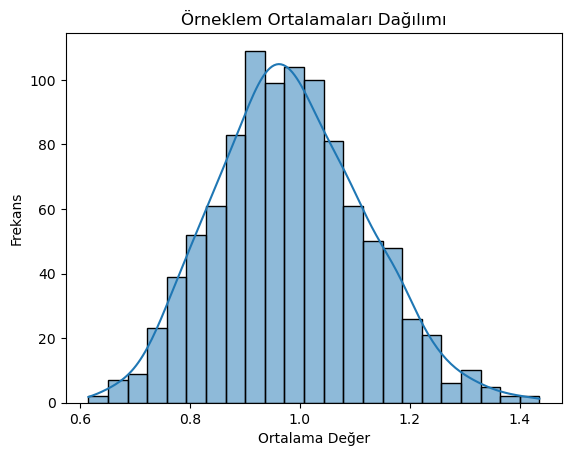

In [18]:
# Basit Simülasyon: Merkezi Limit Teoremi

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Popülasyon simülasyonu
np.random.seed(42)
ana_kitle = np.random.exponential(scale=1.0, size=10000)

# Örneklem alma
orneklem_ortalamalari = []
for _ in range(1000):
    orneklem = np.random.choice(ana_kitle, size=50)
    orneklem_ortalamalari.append(np.mean(orneklem))

# Görselleştirme
sns.histplot(orneklem_ortalamalari, kde=True)
plt.title("Örneklem Ortalamaları Dağılımı")
plt.xlabel("Ortalama Değer")
plt.ylabel("Frekans")
plt.show()

✅ Grafiği gördüğünde fark edeceksin:  
Dağılım artık üstel değil, hemen hemen **normalleşmiş**!

## 📐 7. Parametre mi? İstatistik mi?

| Terim | Açıklama | Sembol |
|--------|----------|---------|
| **Parametre** | Ana kütledeki gerçek değer | μ (mu), σ (sigma) |
| **İstatistik** | Örneklemdeki tahmini değer | x̄ (x bar), s (sample standard sapma) |

📌 İstatistik, parametreyi tahmin etmek içindir.  
Ama bu tahminin tutarlı, yansız ve etkin olması gerekir.

## 📉 8. Tamsayım mı? Örneklem mi?

| Durum | Tamsayım Yapılabilir mi? | Neden? |
|--------|--------------------------|--------|
| **30 işçi** | ✅ Evet | Küçük hacimli sonlu kütle |
| **25.000 öğrenci** | ❌ Hayır | Çok büyük hacimli kütle |
| **Fabrikadan çıkan tüm ürünler** | ❌ Hayır | Sonsuz kütle → sürekli üretim |

📌 Tamsayım, küçük hacimli ve erişilebilir olduğunda yapılır.  
Diğer durumlarda **örneklem** tek yol olur.


## 🧭 9. Örneklem Alırken Nelere Dikkat Edilmeli?

| Faktör | Açıklama |
|--------|----------|
| ✅ Rastgelelik | Her birimin eşit seçilme şansı olmalı |
| ✅ Temsil Yeteneği | Örneklem, anakütleyi yansıtıyor mu? |
| ✅ Veri Kalitesi | Veri eksiksiz ve tutarlı olmalı |
| ✅ Yeterli Büyüklük | Küçük örneklem yanıltıcı olabilir |

📌 Yanlı örneklem → yanlı sonuç → yanlı karar